# Pandas 2

## Series

In [1]:
import pandas as pd
import numpy as np

In [2]:
revenues = pd.Series([555,7000,1980])
revenues

0     555
1    7000
2    1980
dtype: int64

In [3]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [4]:
city_revenues = pd.Series([555,7000,1980], index=['Amsterdam','Tokyo','Beijing'])
city_revenues

Amsterdam     555
Tokyo        7000
Beijing      1980
dtype: int64

In [5]:
city_employee_count = pd.Series({'Amsterdam':5,'Tokyo':8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [6]:
city_data = pd.DataFrame({'revenue':city_revenues,'employee_count':city_employee_count})
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


In [7]:
city_data.columns

Index(['revenue', 'employee_count'], dtype='object')

In [8]:
city_data.index

Index(['Amsterdam', 'Beijing', 'Tokyo'], dtype='object')

# Concat & Merge

In [9]:
further_city_data = pd.DataFrame({'revenue':[7000,3400],'employee_count':[2,2]},index=['New York','Barcelona'])
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [10]:
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


# Concat Vertikal

In [11]:
all_city_data = pd.concat([city_data,further_city_data])
all_city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0
New York,7000,2.0
Barcelona,3400,2.0


# Concat Horizontal

In [14]:
city_countries = pd.DataFrame({'country':['Holland','Japan','Holland','Canada','Spain'],
                               'capital':[1,1,0,0,0]},
                              index=['Amsterdam','Tokyo','Rotterdam','Toronto','Barcelona'])
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [15]:
cities = pd.concat([all_city_data,city_countries],axis=1)
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


In [16]:
pd.concat([all_city_data,city_countries],axis=1,join='inner')
#join menjadikan hanya menampilkan data yang ada pada concat

,revenue,employee_count,country,capital
Amsterdam,555,5.0,Holland,1
Tokyo,7000,8.0,Japan,1
Barcelona,3400,2.0,Spain,0


# Merge

In [17]:
countries = pd.DataFrame({'population_mil':[17,127,37],
                          'continent':['Europe','Asia','North_America']},index=['Holland','Japan','Canada'])
countries

,population_mil,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North_America


In [18]:
countries2 = pd.DataFrame({'population_mil':[17,127,37],
                          'continent':['Europe','Asia','North_America'],
                          'country':['Holland','Japan','Canada']})
countries2

,population_mil,continent,country
0,17,Europe,Holland
1,127,Asia,Japan
2,37,North_America,Canada


In [19]:
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


In [20]:
cities.merge(countries2,on='country',how='inner')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North_America


In [21]:
cities.merge(countries2,on='country',how='left')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,1980.0,NaN,NaN,NaN,NaN,NaN
2,7000.0,8.0,Japan,1.0,127.0,Asia
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,3400.0,2.0,Spain,0.0,NaN,NaN
5,NaN,NaN,Holland,0.0,17.0,Europe
6,NaN,NaN,Canada,0.0,37.0,North_America


In [22]:
cities.merge(countries2,on='country',how='right')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North_America


In [23]:
cities.merge(countries2,on='country',how='outer')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,NaN,NaN,Holland,0.0,17.0,Europe
2,1980.0,NaN,NaN,NaN,NaN,NaN
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,7000.0,8.0,Japan,1.0,127.0,Asia
5,3400.0,2.0,Spain,0.0,NaN,NaN
6,NaN,NaN,Canada,0.0,37.0,North_America


# Data Cleansing with Pandas

In [27]:
df = pd.read_csv('property_data.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [29]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [30]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [31]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [32]:
df['ST_NUM'].fillna(0)

0    104.0
1    197.0
2      0.0
3    201.0
4    203.0
5    207.0
6      0.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

# Non Standard Missing Values

In [33]:
df.NUM_BEDROOMS

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object

In [34]:
df['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [35]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [36]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object

In [37]:
missing_values = ['--','na','n/a']
df2 = pd.read_csv('property_data.csv',na_values=missing_values)
df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [38]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [40]:
type(np.nan)

float

In [41]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [43]:
int('23')

23

In [46]:
cnt = 0
for row in df2['OWN_OCCUPIED']:
  try:
    int(row)
    df2.loc[cnt,'OWN_OCCUPIED'] = np.nan
  except ValueError:
    pass
  cnt+=1

In [47]:
df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [48]:
df.loc[3,'OWN_OCCUPIED']

'12'

In [49]:
df.loc[df.ST_NUM>200,'ST_NAME'] = '200 ST'
df.loc[df.ST_NUM>200,'ST_NAME']

3    200 ST
4    200 ST
5    200 ST
7    200 ST
8    200 ST
Name: ST_NAME, dtype: object

In [50]:
df.loc[3,'OWN_OCCUPIED'] = np.nan
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,200 ST,NaN,1,NaN,700
4,NaN,203.0,200 ST,Y,3,2,1600
5,100006000.0,207.0,200 ST,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,200 ST,Y,1,1,NaN
8,100009000.0,215.0,200 ST,Y,na,2,1800


In [51]:
# Mengecek jumlah value null per masing-masing kolom
df2.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64

In [53]:
# Mengecek jumlah value null pada seluruh kolom
df2.isna().sum().sum()

11

# filling Null with Median/Mean

In [54]:
df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [55]:
df2.NUM_BEDROOMS

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    1.0
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [57]:
df2['NUM_BEDROOMS'].median()

2.5

In [58]:
df2['NUM_BEDROOMS'].fillna(df2['NUM_BEDROOMS'].median(),inplace=True)
df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


# Quiz 1 Replace Value Null pada kolom SQ_FT dengan value mean nya

In [59]:
df2['SQ_FT'].fillna(df2['SQ_FT'].mean(),inplace=True)
df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,NaN,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


# Analyzing Obesity

In [75]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [76]:
data

In [77]:
data.sheet_names

['amCharts']

In [ ]:
data_age = data.parse(u'7.2',skiprows=4)
data_age

In [ ]:
data_age_dropna()

In [ ]:
# drop all null
data_age.dropna(inplace=True)
data_age

In [ ]:
# rename column
data_age.rename(columns={'Unnamed: 0':'Year'},inplace=True)
data_age

In [ ]:
# set index
data_age.set_index('Year',inplace=True)
data_age

In [ ]:
# reset index
data_age.reset_index()

# Plot

In [ ]:
data_age.plot

In [ ]:
data_age.drop('Total',axis=1).plot()

In [ ]:
data_age['Under 16'].plot[label='Dibawah 16', legend=True]
data_age['16-24'].plot(label='16-24', legend=True)
data_age['45-54'].plot(label='45-54', legend=True)
data_age['75 and over'].plot(label='Diatas 75', legend=True)

# Datetime/Time Series

In [82]:
from datetime import datetime

In [83]:
date_range = pd.date_range(start='1/01/2020',end='1/08/2020',freq='H')
date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [84]:
df = pd.DataFrame(date_range,columns=['date'])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [85]:
len(date_range)

169

In [86]:
df['data'] = np.random.randint(0,100,size=len(date_range))

In [87]:
df.head()

,date,data
0,2020-01-01 00:00:00,72
1,2020-01-01 01:00:00,11
2,2020-01-01 02:00:00,65
3,2020-01-01 03:00:00,3
4,2020-01-01 04:00:00,37


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2020-01-01 00:00:00 to 2020-01-08 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   data    169 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [98]:
string_date_range_2 = ['June-01-2020','June-02-2020','June-03-2020']
timestamp_date_range_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_range_2]
timestamp_date_range_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [107]:
datetime.strptime('Jun-01-20','%b-%d-%y')

datetime.datetime(2020, 6, 1, 0, 0)

In [109]:
df2 = pd.DataFrame(timestamp_date_range_2,columns=['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [110]:
list_a = [1,2,3,4,5]
list_comp = [x**2 for x in list_a]
list_compm

[1, 4, 9, 16, 25]

In [111]:
df[df.index.year==2020]

,data
date,
2020-01-01 00:00:00,72
2020-01-01 01:00:00,11
2020-01-01 02:00:00,65
2020-01-01 03:00:00,3
2020-01-01 04:00:00,37
...,...
2020-01-07 20:00:00,46
2020-01-07 21:00:00,26
2020-01-07 22:00:00,30


In [112]:
df[df.index.day==6]

,data
date,
2020-01-06 00:00:00,52
2020-01-06 01:00:00,38
2020-01-06 02:00:00,0
2020-01-06 03:00:00,88
2020-01-06 04:00:00,42
2020-01-06 05:00:00,94
2020-01-06 06:00:00,83
2020-01-06 07:00:00,25
2020-01-06 08:00:00,14


In [113]:
df3 = df.reset_index()

In [114]:
df3[df3.date.day==1]

AttributeError: ignored

In [115]:
df

,data
date,
2020-01-01 00:00:00,72
2020-01-01 01:00:00,11
2020-01-01 02:00:00,65
2020-01-01 03:00:00,3
2020-01-01 04:00:00,37
...,...
2020-01-07 20:00:00,46
2020-01-07 21:00:00,26
2020-01-07 22:00:00,30


In [116]:
df[df.index.day==1]

,data
date,
2020-01-01 00:00:00,72
2020-01-01 01:00:00,11
2020-01-01 02:00:00,65
2020-01-01 03:00:00,3
2020-01-01 04:00:00,37
2020-01-01 05:00:00,70
2020-01-01 06:00:00,36
2020-01-01 07:00:00,5
2020-01-01 08:00:00,69


In [119]:
df.loc['2020-01-01':'2020-01-03']

,data
date,
2020-01-01 00:00:00,72
2020-01-01 01:00:00,11
2020-01-01 02:00:00,65
2020-01-01 03:00:00,3
2020-01-01 04:00:00,37
...,...
2020-01-03 19:00:00,19
2020-01-03 20:00:00,48
2020-01-03 21:00:00,42


In [120]:
df.loc['2020-01-05'].mean()

data    46.708333
dtype: float64

In [121]:
df.resample('D').mean()

,data
date,
2020-01-01,59.916667
2020-01-02,46.583333
2020-01-03,51.958333
2020-01-04,41.916667
2020-01-05,46.708333
2020-01-06,51.000000
2020-01-07,42.375000
2020-01-08,9.000000


In [123]:
df.resample('Y').mean()

,data
date,
2020-12-31,48.402367


In [127]:
# df['rolling']=df.rolling(3).sum()

ValueError: ignored

In [126]:
df

,data,rolling
date,,
2020-01-01 00:00:00,72,NaN
2020-01-01 01:00:00,11,NaN
2020-01-01 02:00:00,65,148.0
2020-01-01 03:00:00,3,79.0
2020-01-01 04:00:00,37,105.0
...,...,...
2020-01-07 20:00:00,46,152.0
2020-01-07 21:00:00,26,169.0
2020-01-07 22:00:00,30,102.0


# Time Series from Dataset

In [128]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')

In [129]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [130]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [132]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [133]:
opsd_daily.set_index('Date',inplace=True)

In [134]:
opsd_daily[opsd_daily.index.year>2015]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2016-01-01,1060.36600,107.209,18.563,125.772
2016-01-02,1192.69800,409.622,9.406,419.028
2016-01-03,1179.28200,406.296,13.519,419.815
2016-01-04,1456.29400,278.460,10.080,288.540
2016-01-05,1506.73700,206.468,12.549,219.017
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [135]:
# menambahkan kolom yaitu year month date
opsd_daily['year'] = opsd_daily.index.year
opsd_daily['month'] = opsd_daily.index.month
opsd_daily['day'] = opsd_daily.index.day
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29


In [137]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   year         4383 non-null   int64  
 5   month        4383 non-null   int64  
 6   day          4383 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 403.0 KB


In [138]:
opsd_daily.loc['2015-09':'2017-10']

,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,
2015-09-01,1454.19300,221.322,94.596,315.918,2015,9,1
2015-09-02,1431.18600,182.791,120.108,302.899,2015,9,2
2015-09-03,1424.91300,113.314,91.536,204.850,2015,9,3
2015-09-04,1398.09000,240.758,123.201,363.959,2015,9,4
2015-09-05,1188.41000,446.861,95.646,542.507,2015,9,5
...,...,...,...,...,...,...,...
2017-10-27,1480.50323,528.191,52.371,580.562,2017,10,27
2017-10-28,1284.26158,819.818,26.799,846.617,2017,10,28
2017-10-29,1176.91823,720.079,52.222,772.301,2017,10,29


In [139]:
opsd_daily.loc['2015-01-01':'2016-12-31mb']

,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,
2015-01-01,1111.336,325.128,17.079,342.207,2015,1,1
2015-01-02,1300.884,603.558,7.758,611.316,2015,1,2
2015-01-03,1265.271,462.953,7.236,470.189,2015,1,3
2015-01-04,1198.854,385.024,19.984,405.008,2015,1,4
2015-01-05,1449.861,216.543,26.524,243.067,2015,1,5
...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,27
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,28
2016-12-29,1295.897,167.698,42.910,210.608,2016,12,29


<Axes: xlabel='Date'>

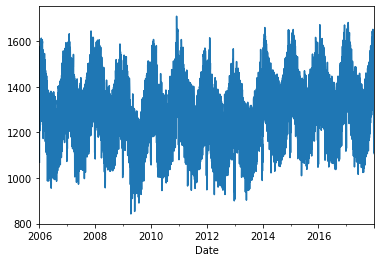

In [140]:
opsd_daily['Consumption'].plot()

<Axes: xlabel='Date'>

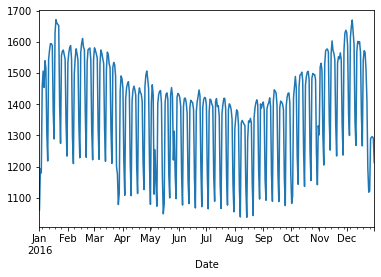

In [142]:
opsd_daily.loc['2016']['Consumption'].plot()

<Axes: xlabel='Date'>

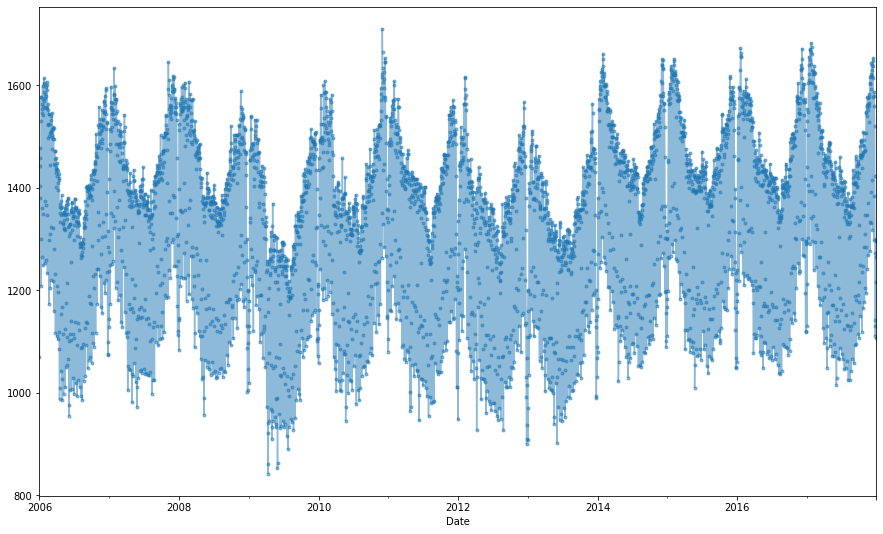

In [143]:
opsd_daily['Consumption'].plot(marker='.',linestyle=None,figsize=(15,9),alpha=0.5)

<Axes: xlabel='Date'>

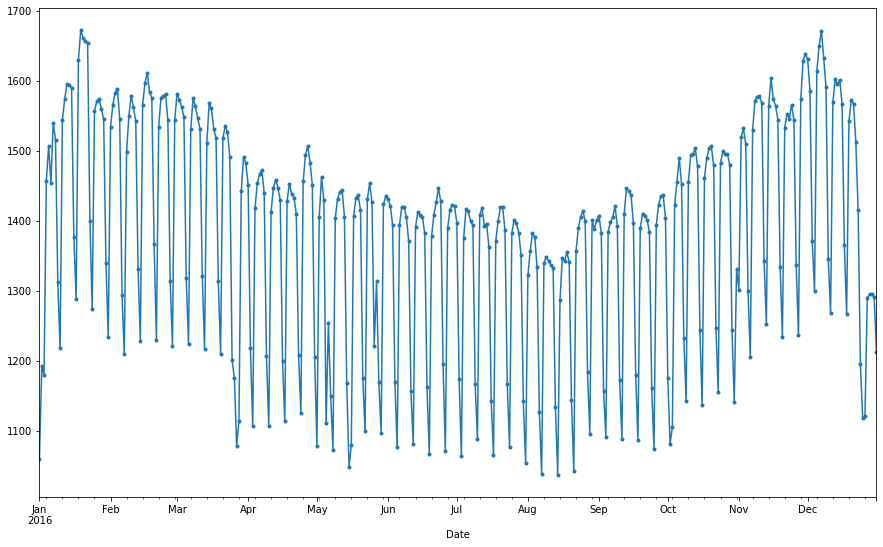

In [145]:
opsd_daily.loc['2016']['Consumption'].plot(marker='.',linestyle=None,figsize=(15,9),alpha=1)